In [1]:
import seaborn as sns
df=sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
# imbalanced datasets
import numpy as np
import pandas as pd

np.random.seed(0)

n_samples = 1000
class_zero_ratio = 0.9

n_class_zero = int(n_samples * class_zero_ratio)
n_class_one = n_samples - n_class_zero

# Generate features for class zero
feature1_class_zero = np.random.normal(loc=0, scale=1, size=n_class_zero)
feature2_class_zero = np.random.normal(loc=0, scale=1, size=n_class_zero)

# Generate features for class one
feature1_class_one = np.random.normal(loc=1, scale=1, size=n_class_one)
feature2_class_one = np.random.normal(loc=1, scale=1, size=n_class_one)

# Create dataframes
class_zero_df = pd.DataFrame({
    'feature1': feature1_class_zero,
    'feature2': feature2_class_zero,
    'target': 0
})

class_one_df = pd.DataFrame({
    'feature1': feature1_class_one,
    'feature2': feature2_class_one,
    'target': 1
})

# Combine dataframes
df = pd.concat([class_zero_df, class_one_df], ignore_index=True)
df

,feature1,feature2,target
0,1.764052,-1.461733,0
1,0.400157,-0.683440,0
2,0.978738,0.367545,0
3,2.240893,0.190312,0
4,1.867558,-0.851729,0
...,...,...,...
995,0.744529,1.097751,1
996,2.685792,2.401523,1
997,-0.648046,1.158434,1
998,1.298714,-0.141901,1


In [ ]:
df['target'].value_counts()
from sklearn.utils import resample

# Separate majority and minority classes

df_minority = df[df['target'] == 1]
df_majority = df[df['target'] == 0]


,count
target,
0,900
1,100


In [ ]:
# up-sampling
df_minority_upsampled = resample(
    df_minority,
    replace=True,  # sample with replacement
    n_samples=len(df_majority),  # match number in majority class
    random_state=42
)
df_upsampled = pd.concat([df_majority, df_minority_upsampled], ignore_index=True)
df_upsampled['target'].value_counts()


,count
target,
0,900
1,900


In [ ]:
# down-sampling
df_majority_downsampled = resample(
    df_majority,
    replace=False,  # sample without replacement
    n_samples=len(df_minority),  # match number in minority class
    random_state=42
)
df_downsampled = pd.concat([df_majority_downsampled, df_minority], ignore_index=True)
df_downsampled['target'].value_counts()

,count
target,
0,100
1,100


In [ ]:
#SMOTE
from sklearn.datasets import make_classification

# Create an imbalanced dataset with 1000 samples, 2 features, 1 cluster per class, and class weights to induce imbalance
X, y = make_classification(n_samples=1000, n_features=2, n_clusters_per_class=1, weights=[0.90], random_state=12, n_redundant=0)


In [ ]:
import pandas as pd

# Create DataFrames for features and target

df1 = pd.DataFrame(X, columns=['f1', 'f2'])
df2 = pd.DataFrame(y, columns=['target'])

# Concatenate features and target into a single DataFrame
final_df = pd.concat([df1, df2], axis=1)
final_df['target'].value_counts()

,count
target,
0,900
1,100


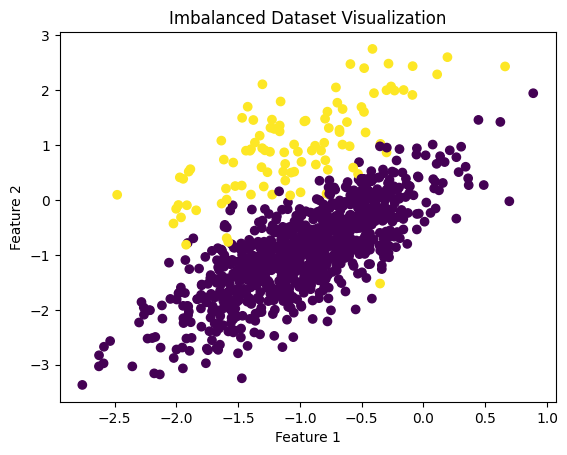

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(final_df['f1'], final_df['f2'], c=final_df['target'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Imbalanced Dataset Visualization')
plt.show()

In [ ]:
# Install imbalanced-learn library
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE oversampler
oversample = SMOTE()

# Apply SMOTE to the dataset
X_resampled, y_resampled = oversample.fit_resample(final_df[['f1', 'f2']], final_df['target'])
X_resampled.shape

(1800, 2)

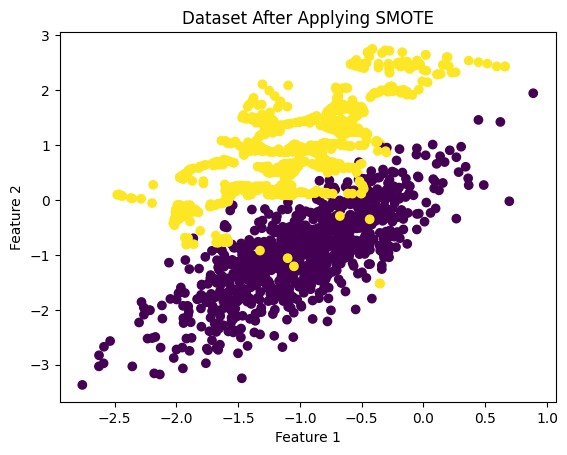

In [ ]:
oversampled_df = pd.concat([
    pd.DataFrame(X_resampled, columns=['f1', 'f2']),
    pd.DataFrame(y_resampled, columns=['target'])
], axis=1)

plt.scatter(oversampled_df['f1'], oversampled_df['f2'], c=oversampled_df['target'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset After Applying SMOTE')
plt.show()

In [ ]:
# 5 number summary and box plot
import numpy as np
marks = [45, 32, 56, 75, 89, 54, 32, 89, 90, 87, 67, 54, 45, 98, 99, 67, 74]
five_number_summary = np.quantile(marks, [0, 0.25, 0.5, 0.75, 1.0])
five_number_summary


array([32., 54., 67., 89., 99.])

In [ ]:
iqr = five_number_summary[3] - five_number_summary[1]
print(iqr)  # Output: 35

35.0


In [ ]:
lower_fence = five_number_summary[1] - 1.5 * iqr
higher_fence = five_number_summary[3] + 1.5 * iqr
print(lower_fence, higher_fence)

1.5 141.5


<Axes: >

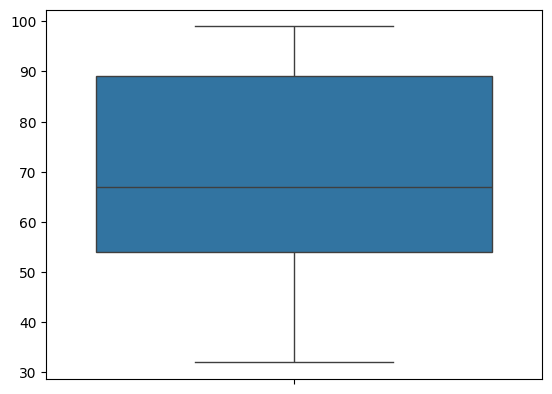

In [ ]:
import seaborn as sns
sns.boxplot(marks)

<Axes: >

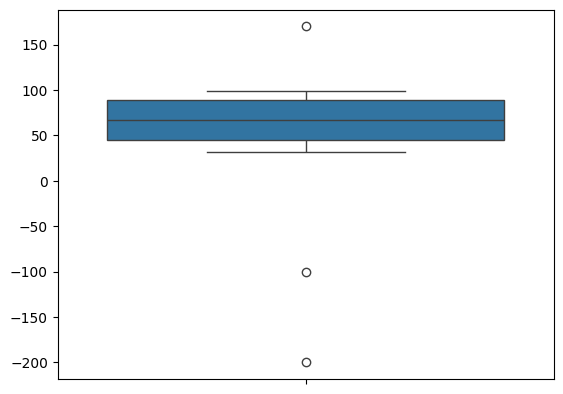

In [ ]:
marks_with_outliers = marks + [-100, -200, 170]
sns.boxplot(marks_with_outliers)

In [3]:
# Nominal encoding using python
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
df=pd.DataFrame({"color":["red", "blue", "green", "red", "blue"]})


,color
0,red
1,blue
2,green
3,red
4,blue


In [5]:
encoder = OneHotEncoder()
encoded = encoder.fit_transform(df[["color"]])  # it craetes a sparse matrix
encoded.toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [7]:
encoded_df = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out(["color"]))
encoded_df.head()

,color_blue,color_green,color_red
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0


In [9]:
df_encoded=pd.concat([df, encoded_df], axis=1)
df_encoded

,color,color_blue,color_green,color_red
0,red,0.0,0.0,1.0
1,blue,1.0,0.0,0.0
2,green,0.0,1.0,0.0
3,red,0.0,0.0,1.0
4,blue,1.0,0.0,0.0


In [12]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['color_encoded'] = label_encoder.fit_transform(df[['color']])
# label_encoder.transform(['red']) for transforming new values
# label_encoder.transform(['blue'])
df


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,color,color_encoded
0,red,2
1,blue,0
2,green,1
3,red,2
4,blue,0


In [17]:
# Ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder
df=pd.DataFrame({'size':['small','medium','large','medium','small','large']})
encoder = OrdinalEncoder(categories=[['small', 'medium', 'large']])
df['size_encoded'] = encoder.fit_transform(df[['size']])
df

,size,size_encoded
0,small,0.0
1,medium,1.0
2,large,2.0
3,medium,1.0
4,small,0.0
5,large,2.0


In [18]:
# target guided ordinal encoding
import pandas as pd

df = pd.DataFrame({
    'city': ['new york', 'london', 'paris', 'tokyo', 'new york', 'paris'],
    'price': [200, 150, 300, 250, 180, 320]
})

df

,city,price
0,new york,200
1,london,150
2,paris,300
3,tokyo,250
4,new york,180
5,paris,320


In [23]:
mean_price = df.groupby('city')['price'].mean().to_dict()
df['city_encoded'] = df['city'].map(mean_price) #mapping the original City values to their corresponding mean prices using the dictionary
df

,city,price,city_encoded
0,new york,200,190.0
1,london,150,150.0
2,paris,300,310.0
3,tokyo,250,250.0
4,new york,180,190.0
5,paris,320,310.0


In [24]:
import seaborn as sns

df = sns.load_dataset('tips')

mean_total_bill = df.groupby('time')['total_bill'].mean().to_dict()
df['time_encoded'] = df['time'].map(mean_total_bill)
df

/tmp/ipython-input-97444816.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_total_bill = df.groupby('time')['total_bill'].mean().to_dict()


,total_bill,tip,sex,smoker,day,time,size,time_encoded
0,16.99,1.01,Female,No,Sun,Dinner,2,20.797159
1,10.34,1.66,Male,No,Sun,Dinner,3,20.797159
2,21.01,3.50,Male,No,Sun,Dinner,3,20.797159
3,23.68,3.31,Male,No,Sun,Dinner,2,20.797159
4,24.59,3.61,Female,No,Sun,Dinner,4,20.797159
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.797159
240,27.18,2.00,Female,Yes,Sat,Dinner,2,20.797159
241,22.67,2.00,Male,Yes,Sat,Dinner,2,20.797159
242,17.82,1.75,Male,No,Sat,Dinner,2,20.797159


,city,price
0,new york,200
1,london,150
2,paris,300
3,tokyo,250
4,new york,180
5,paris,320
